# Assignment 2(due on 11/08)

## Student:胡蓓慧（12332288），Gtihub：beihuihu
## 批改人：张鹏

## 得分：49/50

### 1 Significant earthquakes since 2150 B.C.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Eqs=pd.read_csv("Sig_Eqs.tsv",sep='\t')



In [2]:
#1.1
Eqs.groupby("Country").sum()['Deaths'].nlargest(10)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

<Axes: xlabel='Year'>

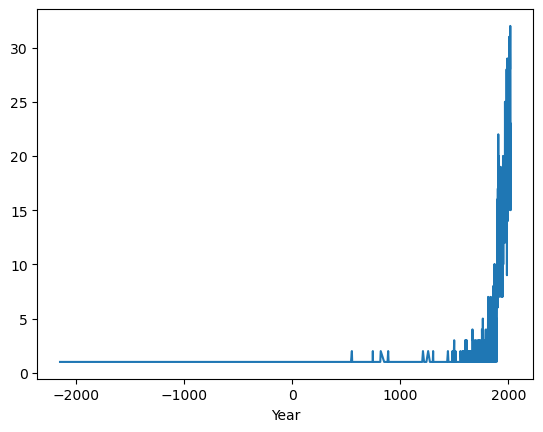

In [5]:
#1.2
Eqs[Eqs['Mag']>6.0].groupby('Year').count()['Mag'].plot()

In [4]:
#1.3
def CountEq_LargestEq(eqs,country,):
    country_eqs=eqs[eqs['Country']==country]
    max_mag=country_eqs[country_eqs['Mag']==country_eqs['Mag'].max()]
    timeList=[]
    for index, row in max_mag.iterrows():
        if row['Year']<0:
            year='BC '+str(int(abs(row['Year'])))
        else:
            year=str(int(row['Year']))
        if pd.notnull(row['Mo']):
            year=year+'-'+str(int(row['Mo']))
            if pd.notnull(row['Dy']):
                year=year+'-'+str(int(row['Dy']))
        timeList.append(year)
    result=pd.DataFrame({'Country':country,'Count':country_eqs.count()['Mag'],'Date':timeList})
    return result 

resultDf=pd.DataFrame(columns=['Country','Count','Date'])
Eqs.dropna(subset = ['Country'])
for country in Eqs['Country'].unique():
    result=CountEq_LargestEq(Eqs,country)
    resultDf=pd.concat([resultDf,result])
print(resultDf.sort_values('Count', ascending=False))

             Country Count        Date
0              CHINA   589   1668-7-25
0              JAPAN   351   2011-3-11
0          INDONESIA   331  2004-12-26
0               IRAN   259   856-12-22
0                USA   223   1964-3-28
..               ...   ...         ...
0      FRENCH GUIANA     1    1885-8-4
0   FRENCH POLYNESIA     1   1848-7-12
0               TOGO     1        1788
0       SIERRA LEONE     1   1795-5-20
0            COMOROS     1   2018-5-15

[169 rows x 3 columns]


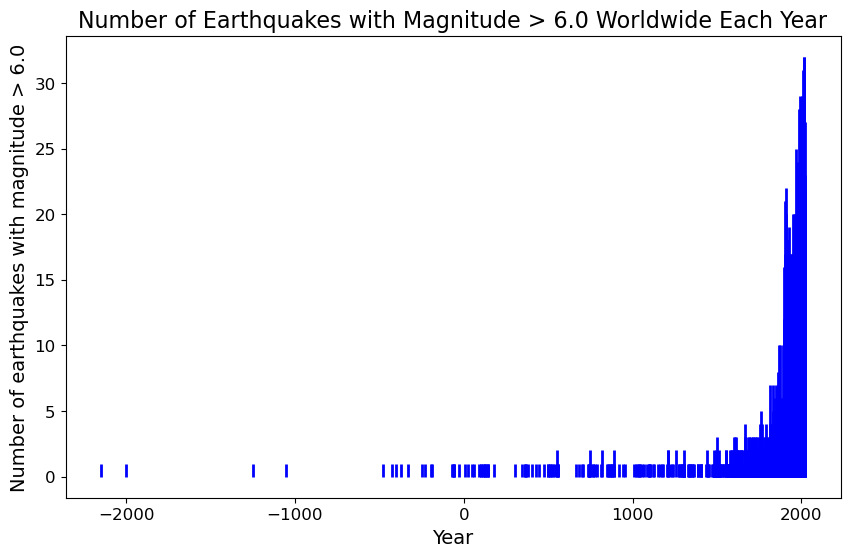

In [16]:
#1.2 助教添加
# 筛选出震级大于6.0的地震
large_quakes = Eqs[Eqs['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析。第二问绘图有一点点问题，建议绘制竖线图，见上面代码助教添加代码


### 得分：24/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

/tmp/ipykernel_408867/2981335908.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  WS=pd.read_csv("2281305.csv")


                     Direction  DirectionQuality Type  Speed  SpeedQuality
Time                                                                      
2010-01-02 00:00:00         40                 1    N    2.0             1
2010-01-02 01:00:00        999                 9    V    1.0             1
2010-01-02 02:00:00        999                 9    C    0.0             1
2010-01-02 03:00:00        140                 1    N    1.0             1
2010-01-02 04:00:00        300                 1    N    4.0             1


<Axes: xlabel='Time'>

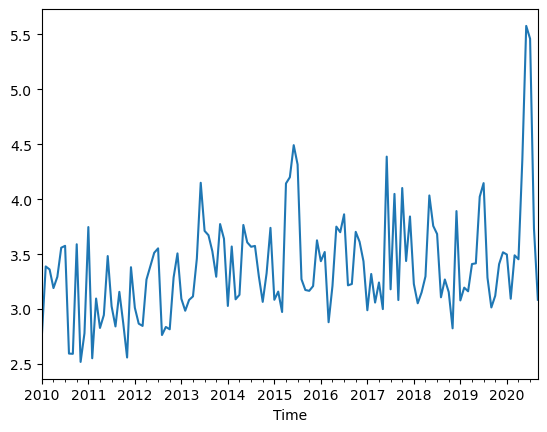

In [6]:
WS=pd.read_csv("2281305.csv")

#分割'WDN'字段
def splitWND(x,num):
    strs=x.split(',')[num]
    if num==2:
        return strs
    elif num==3:#speed
        if strs=='9999':#no value
            return np.nan
        else:
            return float(x.split(',')[num])/10
    else:
        return int(x.split(',')[num])
    
WS['Direction']=WS['WND'].apply(splitWND,num=0)
WS['DirectionQuality']=WS['WND'].apply(splitWND,num=1)
WS['Type']=WS['WND'].apply(splitWND,num=2)
WS['Speed']=WS['WND'].apply(splitWND,num=3)
WS['SpeedQuality']=WS['WND'].apply(splitWND,num=4)
WS['Time']= pd.to_datetime(WS['DATE'])
WindSpeed=WS[['Time','Direction','DirectionQuality','Type','Speed','SpeedQuality']].set_index('Time')
print(WindSpeed.head())

WindSpeed.resample('M') ['Speed'].mean().plot()

### 第二题代码运行正常，可以输出正确结果。报告中展现了代码和结果，以及对总体趋势的描述。

### 得分10/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

In [7]:
#3.1
SLP=pd.read_csv("problem3data.csv")
SLP

,STATION,DATE,SLP,TMP
0,59493099999,2010-01-02T00:00:00,"10161,1","+0161,1"
1,59493099999,2010-01-02T01:00:00,"99999,9","+0170,1"
2,59493099999,2010-01-02T02:00:00,"99999,9","+0180,1"
3,59493099999,2010-01-02T03:00:00,"10169,1","+0192,1"
4,59493099999,2010-01-02T04:00:00,"99999,9","+0180,1"
...,...,...,...,...
8705,59493099999,2010-12-31T19:00:00,"99999,9","+0130,1"
8706,59493099999,2010-12-31T20:00:00,"99999,9","+0130,1"
8707,59493099999,2010-12-31T21:00:00,"10188,1","+0120,1"
8708,59493099999,2010-12-31T22:00:00,"99999,9","+0110,1"


In [8]:
def splitSLP(x,num):
    strs=x.split(',')[num]
    if num==0:#sea level pressure
        if strs=='99999':#no value
            return np.nan
        else:
            return float(strs)/10
    else:
        return int(strs)

def splitTMP(x,num):
    strs=x.split(',')[num]
    if num==0:
        if strs=='9999':#no value
            return np.nan
        else:
            return float(strs)/10
    else:
        return int(x.split(',')[num])
    
SLP['seeLevelPressure']=SLP['SLP'].apply(splitSLP,num=0)
SLP['seeLevelPressureQuality']=SLP['SLP'].apply(splitSLP,num=1)
SLP['airTemperature']=SLP['TMP'].apply(splitTMP,num=0)
SLP['airTemperatureQuality']=SLP['TMP'].apply(splitTMP,num=1)
SLP=SLP.dropna()
SLP


,STATION,DATE,SLP,TMP,seeLevelPressure,seeLevelPressureQuality,airTemperature,airTemperatureQuality
0,59493099999,2010-01-02T00:00:00,"10161,1","+0161,1",1016.1,1,16.1,1
3,59493099999,2010-01-02T03:00:00,"10169,1","+0192,1",1016.9,1,19.2,1
6,59493099999,2010-01-02T06:00:00,"10146,1","+0184,1",1014.6,1,18.4,1
9,59493099999,2010-01-02T09:00:00,"10149,1","+0160,1",1014.9,1,16.0,1
12,59493099999,2010-01-02T12:00:00,"10167,1","+0156,1",1016.7,1,15.6,1
...,...,...,...,...,...,...,...,...
8695,59493099999,2010-12-31T09:00:00,"10171,1","+0176,1",1017.1,1,17.6,1
8698,59493099999,2010-12-31T12:00:00,"10181,1","+0153,1",1018.1,1,15.3,1
8701,59493099999,2010-12-31T15:00:00,"10188,1","+0142,1",1018.8,1,14.2,1
8704,59493099999,2010-12-31T18:00:00,"10188,1","+0131,1",1018.8,1,13.1,1


/tmp/ipykernel_408867/2505944859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SLP['DATE']= pd.to_datetime(SLP['DATE'])


<Axes: xlabel='DATE'>

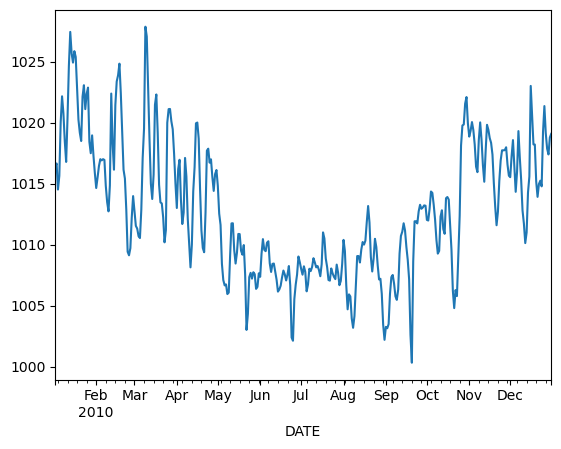

In [9]:
#3.2
SLP['DATE']= pd.to_datetime(SLP['DATE'])
SLP=SLP.set_index('DATE')
SLP.resample('D')['seeLevelPressure'].mean().plot()

<Axes: xlabel='DATE'>

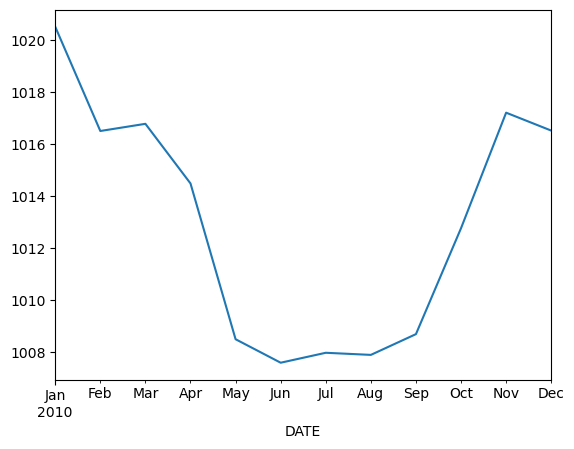

In [10]:
#3.3
SLP.resample('M')['seeLevelPressure'].mean().plot()

<Axes: xlabel='DATE'>

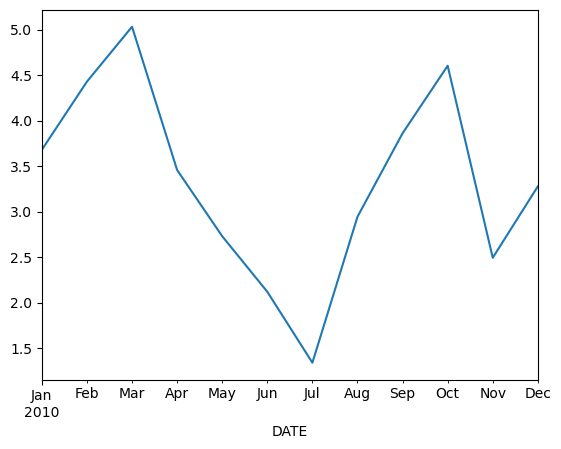

In [11]:
SLP.resample('M')['seeLevelPressure'].std().plot()


<Axes: xlabel='DATE'>

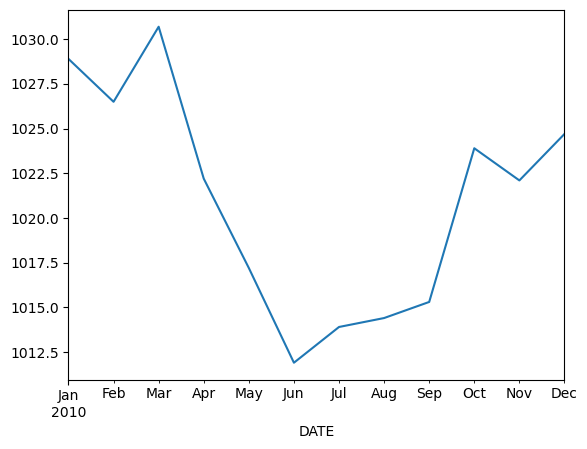

In [13]:
SLP.resample('M')['seeLevelPressure'].max().plot()

<Axes: xlabel='DATE'>

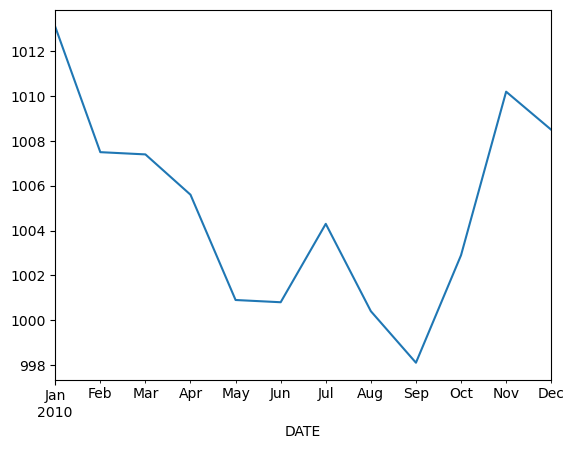

In [14]:

SLP.resample('M')['seeLevelPressure'].min().plot()

### 第三题代码输出结果正确，也在报告中展现了输出结果和相应的分析
### 得分15/15
